In [3]:
from urllib.request import urlopen

import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose
)
import glob
import os

import pprint

In [4]:
def load_image(jpg):
    img = cv2.imread(jpg)
    return img

In [5]:
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=15):
    x_min, y_min, x_max, y_max = bbox
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    #plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [6]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params={'format': 'pascal_voc',
                                     'min_area': min_area, 'min_visibility': min_visibility, 'label_fields': ['category_id']})

In [8]:
sorted(glob.glob('./duckrabbit/*'))

['./duckrabbit/duck_01.JPG',
 './duckrabbit/duck_01.xml',
 './duckrabbit/duck_02.JPG',
 './duckrabbit/duck_02.xml',
 './duckrabbit/rabbit_01.JPG',
 './duckrabbit/rabbit_01.xml',
 './duckrabbit/rabbit_02.JPG',
 './duckrabbit/rabbit_02.xml',
 './duckrabbit/rabbit_03.JPG',
 './duckrabbit/rabbit_03.xml',
 './duckrabbit/rabbit_04.JPG',
 './duckrabbit/rabbit_04.xml',
 './duckrabbit/test.zip']

In [9]:
img = load_image('./duckrabbit/duck_02.JPG')

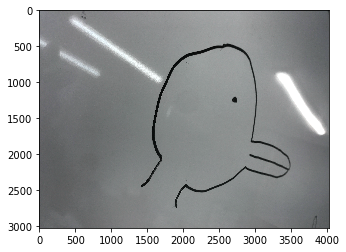

In [10]:
plt.imshow(img)

In [11]:
# Annotations for image 386298 from COCO http://cocodataset.org/#explore?id=386298
annotations = {'image': img, 'bboxes': [[735, 762, 3495, 2515]], 'category_id': [3]}
category_id_to_name = {3: 'duck'}

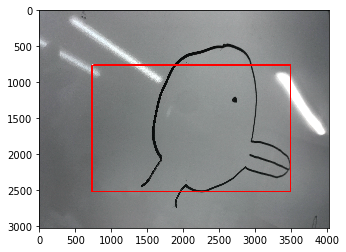

In [12]:
visualize(annotations, category_id_to_name)

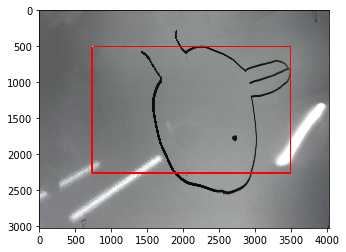

In [13]:
aug = get_aug([VerticalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

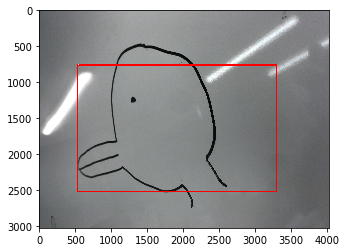

In [14]:
aug = get_aug([HorizontalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

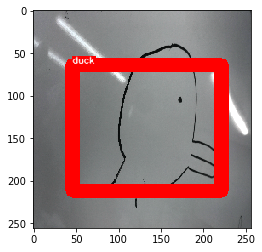

In [15]:
aug = get_aug([Resize(p=1, height=256, width=256)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

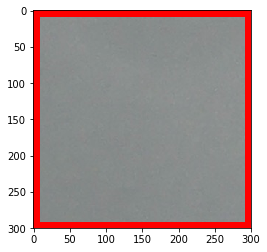

In [16]:
aug = get_aug([CenterCrop(p=1, height=300, width=300)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

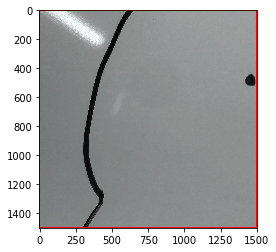

In [17]:
# 300x300 was too small to have any meaningful result, with 1500 it works fine.
# Original image shape is - (3024, 4032, 3)

aug = get_aug([CenterCrop(p=1, height=1500, width=1500)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

[3]


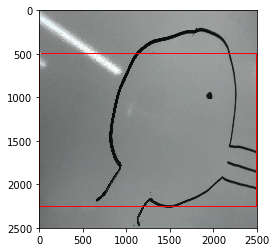

In [18]:
# Same with 2500 size
dim = 2500

aug = get_aug([CenterCrop(p=1, height=dim, width=dim)])
augmented = aug(**annotations)
print(augmented['category_id'])
visualize(augmented, category_id_to_name)

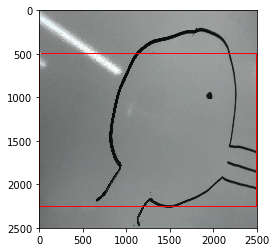

In [19]:
aug = get_aug([CenterCrop(p=1, height=dim, width=dim)], min_area=4000)
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

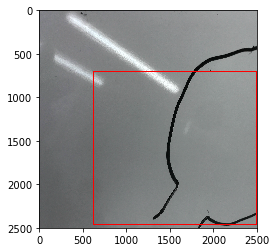

In [20]:
# For this image, because annotation bbox is in the center,
# min_area parameter won't change anything for CenterCrop.
# If you'd like to experiment with random crops but still keep
# proper min_area, then try RandomCrop like here :).

aug = get_aug([RandomCrop(p=1, height=dim, width=dim)], min_area=4000)
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

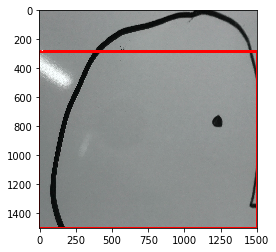

In [21]:
# Same as above, use RandomCrop with min_visibility for this image

dim = 1500

# Compose filters bounding boxes and returns
# only those boxes whose visibility after transformation is above the threshold.
aug = get_aug([RandomCrop(p=1, height=dim, width=dim)], min_visibility=0.3)
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

# Visibility of the transformed bbox for `dog` is about 0.25 (that means that
# the area of the transformed bbox is about 25% of the area of the original bbox),
# so it will be removed
# Visibility of the transformed bbox for `cat` is about 0.36,
# so it will be kept.

In [22]:
augmented

{'image': array([[[134, 139, 138],
         [134, 139, 138],
         [135, 140, 139],
         ...,
         [153, 155, 155],
         [153, 155, 155],
         [152, 151, 153]],
 
        [[134, 139, 138],
         [134, 139, 138],
         [135, 140, 139],
         ...,
         [153, 155, 155],
         [153, 155, 155],
         [154, 153, 155]],
 
        [[135, 141, 140],
         [135, 141, 140],
         [134, 140, 139],
         ...,
         [152, 154, 155],
         [151, 153, 154],
         [153, 154, 158]],
 
        ...,
 
        [[122, 128, 127],
         [122, 128, 127],
         [122, 128, 127],
         ...,
         [140, 144, 145],
         [140, 144, 145],
         [141, 143, 144]],
 
        [[125, 130, 129],
         [124, 129, 128],
         [124, 129, 128],
         ...,
         [140, 144, 145],
         [142, 146, 147],
         [140, 142, 143]],
 
        [[124, 129, 128],
         [124, 129, 128],
         [124, 129, 128],
         ...,
         [140, 144,